# WISER SIMS Data Extraction Question Distribution Analysis

This takes standard SIMS Data Extraction files and a creates a distribution of the answers for a selected questions and plots it.
- Author  : John Lutz <lutzjw@upmc.edu>
- Created : 2020-02-25
- Edited : 2020-02-25

## Some Assumptions
- You are using an unaltered SIMS data extraction file
- The question must be a multiple choice question of some type (Likert, Selection, etc)
- You have an `Analysis/Q-Distribution` directory in the folder your are running this Jupyter notebook. This is where the analysis files will go.

## Instructions

- Change the variables in the section below. The ones you will need to always change are:
    - `file`
        - Get the Data Extraction file from SIMS
            - This is the Excel file straight from SIMS Data Extraction
            - You need to have selected "Correctness" for the "Quiz Reponses" when you generate the file
            - Drag it from your computer and drop it into the file browser in Jupyter (just to the left here)
            - Right click on the file and select "Copy path" from the data file you want and paste it into the `file` variable below
    - `qID1` and `qID2`
        - These are the the two columns of data you want to compare. They should be likert scales.
        - Make sure there are doulble quotes around the IDs: "Q23"
        - Don't forget the asteriks if appliccable for retired questions (e.g. "*Q24")
        - _These need to be on the same scale for this to make sense_
    - `likertMax`
        - This is the maximum value you can select for this liker (typically 5 or 9)

- Once you have made your changes hit the **SHIFT-RETURN** keys together to run the analysis
- Scroll to the bottom to see the results

Output File : Analysis/Q-Distribution/NUR-1121-Since-2010-Q-Distribution-Q8-Q36.pdf


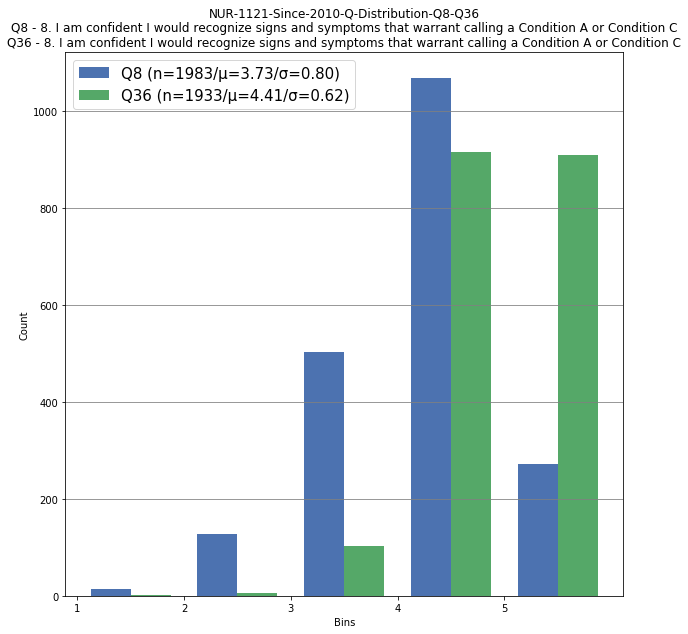

In [1]:
file = "WISER/data/NUR1121/NUR-1121-Since-2010.xlsx"
#Put the first and second Question IDs here.
qID1 = "Q8"   #Don't forget the '*'' if needed!
qID2 = "Q36"  #Don't forget the '*'' if needed!
likertMax = 5

####################################################################
#  This is the end of the section where you can change variables   #
####################################################################
%matplotlib inline
import pandas as pd
#from scipy import stats
import math
import os
#from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np

#set the 
fileLabel = qID1+'-'+qID2

#Add my home directory to the path and get the base file name
file = "~/" + file
base = os.path.basename(file)
fileName=os.path.splitext(base)[0]

# Open up the Excel File
xl = pd.ExcelFile(file)

#Find the Question Text
qSheet = xl.parse('Question Dictionary', index_col="Q#")
q1Text = qID1+ " - " +qSheet.loc[qID1].Text
q2Text = qID2+ " - " +qSheet.loc[qID2].Text
        
ds = xl.parse('User') # The User sheet holds the data by default.
ds['ClsDate'] = pd.to_datetime(ds['ClsDate']) #change string to real datatime

q1Results = ds[qID1].replace(-999).dropna()
q2Results = ds[qID2].replace(-999).dropna()

#Start the plotting...
plt.style.use('seaborn-deep') #Nice dark style - seaborn-deep
fig, axs = plt.subplots(1,1)
#create the histograms
axs.hist([q1Results,q2Results], bins=np.arange(1, likertMax+2, 1), rwidth=0.75, label=[qID1, qID2])

#set the chart size (in inches)
fig.set_size_inches(10,10)

#Set the number of ticks on the X axis
plt.xticks(np.arange(1, likertMax+1, 1))
#turn on the grid
plt.grid(b=True, axis='y', color='gray')

#Get the text for the legend
q1Stats = q1Results.describe()
q1Str  = qID1+" (n={:.0f}/".format(q1Stats[0]) #Count
q1Str  = q1Str+"μ={:4.2f}/".format(q1Stats[1]) #Mean
q1Str  = q1Str+"σ={:4.2f})".format(q1Stats[2]) #StdDev

q2Stats = q2Results.describe()
q2Str  = qID2+" (n={:.0f}/".format(q2Stats[0]) #Count
q2Str  = q2Str+"μ={:4.2f}/".format(q2Stats[1]) #Mean
q2Str  = q2Str+"σ={:4.2f})".format(q2Stats[2]) #StdDev

plt.legend([q1Str, q2Str], loc='upper left', fontsize=15)
axs.set_title(fileName+ '-Q-Distribution-' +fileLabel+ "\n" +q1Text+ "\n" +q2Text)
axs.set_ylabel("Count")
axs.set_xlabel("Bins")

outFileStr = 'Analysis/Q-Distribution/' +fileName+'-Q-Distribution-'+fileLabel+'.pdf'
print ('Output File : ' +outFileStr)
plt.savefig(outFileStr)
